In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cm
from salishsea_tools import viz_tools

## Years: 2007, 2008, 2009, 2010, 2011, 2012, 2023 and 2024

In [15]:
phys_mon_2024 = xr.open_dataset('/ocean/cdonaldson/stair_extractions/SalishSeaCast_day_avg_phys_00_05_20240615_20240615.nc').isel(depth=1)
phys_mon_2023 = xr.open_dataset('/ocean/cdonaldson/stair_extractions/SalishSeaCast_day_avg_phys_00_05_20230615_20230615.nc').isel(depth=1)
phys_mon_2012 = xr.open_dataset('/ocean/cdonaldson/stair_extractions/SalishSeaCast_day_avg_phys_00_05_20120615_20120615.nc').isel(depth=1)
phys_mon_2011 = xr.open_dataset('/ocean/cdonaldson/stair_extractions/SalishSeaCast_day_avg_phys_00_05_20110615_20110615.nc').isel(depth=1)
phys_mon_2010 = xr.open_dataset('/ocean/cdonaldson/stair_extractions/SalishSeaCast_day_avg_phys_00_05_20100615_20100615.nc').isel(depth=1)
phys_mon_2009 = xr.open_dataset('/ocean/cdonaldson/stair_extractions/SalishSeaCast_day_avg_phys_00_05_20090615_20090615.nc').isel(depth=1)
phys_mon_2008 = xr.open_dataset('/ocean/cdonaldson/stair_extractions/SalishSeaCast_day_avg_phys_00_05_20080615_20080615.nc').isel(depth=1)
phys_mon_2007 = xr.open_dataset('/ocean/cdonaldson/stair_extractions/SalishSeaCast_day_avg_phys_00_05_20070615_20070615.nc').isel(depth=1)

In [16]:
# get the bathymetry file
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

# open the mesh mask and use it to mask the land
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

/tmp/ipykernel_4186309/103106464.py:8: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  colours = axs[0,0].pcolormesh(bathy.nav_lon, bathy.nav_lat, salinity, vmin=0, vmax=33, cmap=cmap)
/tmp/ipykernel_4186309/103106464.py:18: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  colours = axs[0,1].pcolormesh(bathy.nav_lon, bathy.nav_lat, salinity, vmin=0, vmax=33, cmap=cmap)
/tmp/ipykernel_4186309/103106464.py:28: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell ed

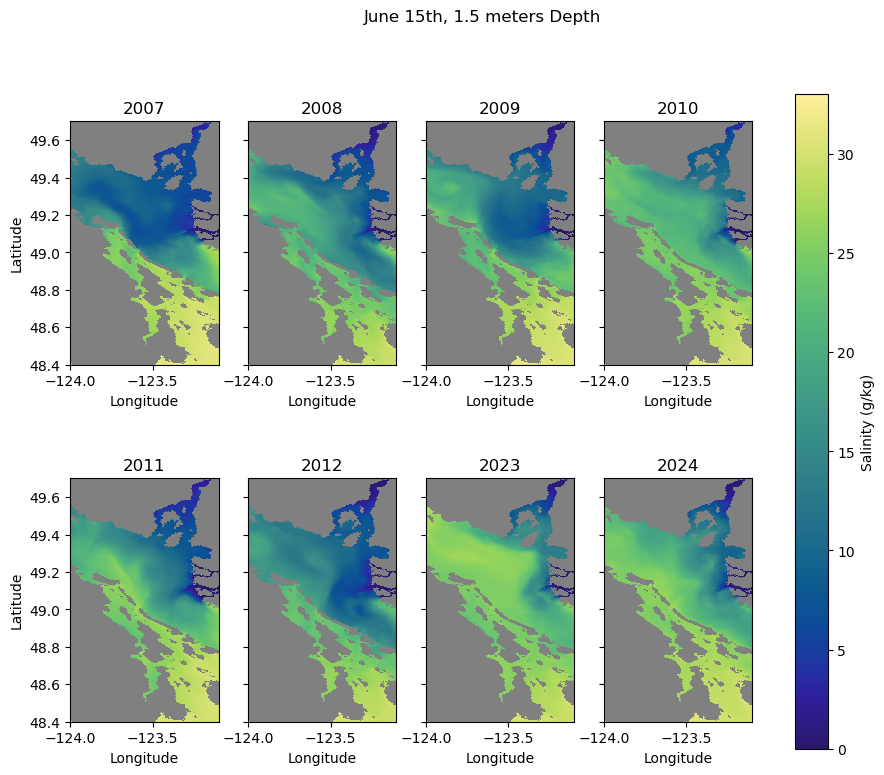

In [47]:
cmap = cm.haline
cmap.set_bad('gray')
fig, axs = plt.subplots(2, 4, figsize=(11, 8.5), sharey=True)
fig.suptitle('June 15th, 1.5 meters Depth')

# 2007
salinity = np.ma.masked_array(phys_mon_2007.vosaline[0], mask=tmask[0])
colours = axs[0,0].pcolormesh(bathy.nav_lon, bathy.nav_lat, salinity, vmin=0, vmax=33, cmap=cmap)
axs[0,0].set_title('2007')
axs[0,0].set_xlim([-124.0, -123.1])
axs[0,0].set_ylim([48.40, 49.7])
axs[0,0].set_ylabel('Latitude')
axs[0,0].set_xlabel('Longitude')
viz_tools.set_aspect(axs[0,0]);

# 2008
salinity = np.ma.masked_array(phys_mon_2008.vosaline[0], mask=tmask[0])
colours = axs[0,1].pcolormesh(bathy.nav_lon, bathy.nav_lat, salinity, vmin=0, vmax=33, cmap=cmap)
axs[0,1].set_title('2008')
axs[0,1].set_xlim([-124.0, -123.1])
axs[0,1].set_ylim([48.40, 49.7])
# axs[0,1].set_ylabel('Latitude')
axs[0,1].set_xlabel('Longitude')
viz_tools.set_aspect(axs[0,1]);

# 2009
salinity = np.ma.masked_array(phys_mon_2009.vosaline[0], mask=tmask[0])
colours = axs[0,2].pcolormesh(bathy.nav_lon, bathy.nav_lat, salinity, vmin=0, vmax=33, cmap=cmap)
axs[0,2].set_title('2009')
axs[0,2].set_xlim([-124.0, -123.1])
axs[0,2].set_ylim([48.40, 49.7])
# axs[0,2].set_ylabel('Latitude')
axs[0,2].set_xlabel('Longitude')
viz_tools.set_aspect(axs[0,2]);

# 2010
salinity = np.ma.masked_array(phys_mon_2010.vosaline[0], mask=tmask[0])
colours = axs[0,3].pcolormesh(bathy.nav_lon, bathy.nav_lat, salinity, vmin=0, vmax=33, cmap=cmap)
axs[0,3].set_title('2010')
axs[0,3].set_xlim([-124.0, -123.1])
axs[0,3].set_ylim([48.40, 49.7])
# axs[0,3].set_ylabel('Latitude')
axs[0,3].set_xlabel('Longitude')
viz_tools.set_aspect(axs[0,3]);

# 2011
salinity = np.ma.masked_array(phys_mon_2011.vosaline[0], mask=tmask[0])
colours = axs[1,0].pcolormesh(bathy.nav_lon, bathy.nav_lat, salinity, vmin=0, vmax=33, cmap=cmap)
axs[1,0].set_title('2011')
axs[1,0].set_xlim([-124.0, -123.1])
axs[1,0].set_ylim([48.40, 49.7])
axs[1,0].set_ylabel('Latitude')
axs[1,0].set_xlabel('Longitude')
viz_tools.set_aspect(axs[1,0]);

# 2012
salinity = np.ma.masked_array(phys_mon_2012.vosaline[0], mask=tmask[0])
colours = axs[1,1].pcolormesh(bathy.nav_lon, bathy.nav_lat, salinity, vmin=0, vmax=33, cmap=cmap)
axs[1,1].set_title('2012')
axs[1,1].set_xlim([-124.0, -123.1])
axs[1,1].set_ylim([48.40, 49.7])
# axs[1,1].set_ylabel('Latitude')
axs[1,1].set_xlabel('Longitude')
viz_tools.set_aspect(axs[1,1]);

# 2023
salinity = np.ma.masked_array(phys_mon_2023.vosaline[0], mask=tmask[0])
colours = axs[1,2].pcolormesh(bathy.nav_lon, bathy.nav_lat, salinity, vmin=0, vmax=33, cmap=cmap)
axs[1,2].set_title('2023')
axs[1,2].set_xlim([-124.0, -123.1])
axs[1,2].set_ylim([48.40, 49.7])
# axs[1,2].set_ylabel('Latitude')
axs[1,2].set_xlabel('Longitude')
viz_tools.set_aspect(axs[1,2]);

# 2024
salinity = np.ma.masked_array(phys_mon_2024.vosaline[0], mask=tmask[0])
colours = axs[1,3].pcolormesh(bathy.nav_lon, bathy.nav_lat, salinity, vmin=0, vmax=33, cmap=cmap)
cb = fig.colorbar(colours, ax=axs[:,:])
cb.set_label('Salinity (g/kg)')
axs[1,3].set_title('2024')
axs[1,3].set_xlim([-124.0, -123.1])
axs[1,3].set_ylim([48.40, 49.7])
# axs[1,3].set_ylabel('Latitude')
axs[1,3].set_xlabel('Longitude')
viz_tools.set_aspect(axs[1,3]);